**Q1.1 - Mean Score of one resampling from data**

In [1]:
import numpy as np1
import pandas as pd1
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
import io
bring = pd1.read_csv(io.BytesIO(uploaded['restaurant_inspection_scores.csv']))
pop_restaurants = Table.read_table('restaurant_inspection_scores.csv').drop('Facility ID','Process Description')
def one_resampled_mean(data):
    resampled_data = data.sample()
    return np1.mean(resampled_data.column('Score'))
# Visualize one call of your function:
this_mean = one_resampled_mean(pop_restaurants)
print("Mean Score of one resampling from data is ",this_mean)


/usr/local/lib/python3.7/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.7/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


Saving restaurant_inspection_scores.csv to restaurant_inspection_scores (1).csv
Mean Score of one resampling from data is  91.38129437353798


**Q1.2 - 5000 Resampled Mean Restaurant Scores.**

In [2]:
restaurant_sample = pop_restaurants.sample(100, with_replacement=False)
def bootstrap_scores():
    resampled_means = make_array()
    for i in range(5000):
        resampled_mean = one_resampled_mean(restaurant_sample)
        resampled_means = np1.append(resampled_means,resampled_mean)
    return resampled_means

resampled_means = bootstrap_scores()
resampled_means

array([92.02, 91.14, 92.12, ..., 91.5 , 89.69, 92.25])

**Q1.3 - Compute a 95 percent conﬁdence interval for the average restaurant score using the array resampled means.**

In [3]:
lower_bound = percentile(2.5, resampled_means)
upper_bound = percentile(97.5, resampled_means)
print("95% confidence interval for the average restaurant score, computed by bootstrapping:\n(",lower_bound, ",", upper_bound, ")")

95% confidence interval for the average restaurant score, computed by bootstrapping:
( 89.71 , 92.44 )


Q4 - 

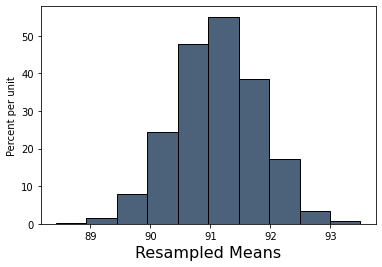

In [4]:
Table().with_column('Resampled Means', resampled_means).hist()

**Q6 -  calculate an interval around the sample mean that covers approximately 95% of the numbers in the resampled means array**

In [5]:
sample_mean = np1.mean(restaurant_sample.column('Score'))
sample_dev = np1.std(restaurant_sample.column('Score'))
sample_size = restaurant_sample.num_rows

dev_means = np1.std(pop_restaurants.column('Score'))/np1.sqrt(sample_size)
lower_bound_normal = sample_mean - 2*dev_means
upper_bound_normal = sample_mean + 2*dev_means
print("95% confidence interval for the average restaurant score, computed by a normal approximation:\n(",lower_bound_normal, ",", upper_bound_normal, ")")


95% confidence interval for the average restaurant score, computed by a normal approximation:
( 89.56618327076103 , 92.63381672923896 )


**Q 2.1 - Deﬁne the function one statistic prop heads which should return exactly one simulated statistic of the proportion of heads from n coin ﬂips.**

In [10]:
coin_proportions = make_array(.5, .5) # our coin is fair

def one_statistic_prop_heads(n):
    simulated_proportions = sample_proportions(n, coin_proportions)
    prop_heads = simulated_proportions.item(0)
    return prop_heads

**Q 2.2 - Write a function called sample size n that takes in a sample size n. It should return an array that contains 5000 sample proportions of heads, each from n coin ﬂips.**

In [7]:
def sample_size_n(n):
    coin_proportions = make_array(.5, .5) # our coin is fair
    heads_proportions = make_array()
    for i in np.arange(5000):
        prop_heads = sample_proportions(n, coin_proportions)
        heads_proportions = np1.append(heads_proportions,prop_heads)
    return heads_proportions

sample_size_n(50)

uploaded = files.upload()
bring = pd1.read_csv(io.BytesIO(uploaded['united_summer2015.csv'])) #importing Flights data from data set
united = Table.read_table('united_summer2015.csv')
united_std = np1.std(united.column('Delay'))
united_std

Saving united_summer2015.csv to united_summer2015 (1).csv


39.480199851609314

**Q 2.3 - Empirical Sample mean function which returns standard deviation of the means of those 500 samples**

In [8]:
def empirical_sample_mean_sd(n):
    sample_means = make_array()
    for i in np.arange(500):
        sample = united.sample(n,with_replacement=True).column('Delay')
        sample_mean = np1.mean(sample)
        sample_means = np1.append(sample_means,sample_mean)
    return np1.std(sample_means)

empirical_sample_mean_sd(10)

11.433208550533836

**Q 2.4 - Predict Sample mean sd function which returns predicted value of the standard deviation of the mean delay time for samples of size n from the ﬂight delays** 

In [9]:
def predict_sample_mean_sd(n):
    return united_std/np1.sqrt(n)

predict_sample_mean_sd(10)

12.484735400972708